# Human Activity Recognition from Wearable Inertial Sensor Networks Part 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Table of Contents
 
- [Import library and define visualization parameters](#Import-library-and-define-visualization-parameters)
- [Declaration of functions used](#Declaration-of-functions-used)
- [Import data](#Import-data)
- [Display and summarize datasets](#Display-and-summarize-datasets)
- [Data preprocessing](#Data-preprocessing)
- [Data normalization and correlation](#Data-normalization-and-correlation)
- [Data visualization](#Data-visualization)
- [Save data in pickle format in google drive](#Save-data-in-pickle-format-in-google-drive)


# Import library and define visualization parameters

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import glob

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Define certain standard parameters at the outset
pd.options.display.float_format = '{: .4f}'. format
np.set_printoptions(precision=4)
plt.style.use ('ggplot')
# Files
path_to_file = '/content/drive/MyDrive/myproject/data'
all_files = glob.glob(path_to_file + "/*.txt")

# Declaration of functions used

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [ ]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

# Import data

In [ ]:
li = []
colnames = ['acc_rf_x', 'acc_rf_y', 'acc_rf_z', 'gyro_rf_x', 'gyro_rf_y', 'gyro_rf_z', 'acc_rs_x', 'acc_rs_y', 'acc_rs_z', 'gyro_rs_x', 'gyro_rs_y', 'gyro_rs_z', 'acc_rt_x', 'acc_rt_y', 'acc_rt_z', 'gyro_rt_x', 'gyro_rt_y', 'gyro_rt_z', 'acc_lf_x', 'acc_lf_y', 'acc_lf_z', 'gyro_lf_x', 'gyro_lf_y', 'gyro_lf_z', 'acc_ls_x', 'acc_ls_y', 'acc_ls_z', 'gyro_ls_x', 'gyro_ls_y', 'gyro_ls_z', 'acc_lt_x', 'acc_lt_y', 'acc_lt_z', 'gyro_lt_x', 'gyro_lt_y', 'gyro_lt_z', 'EMG_r', 'EMG_l', 'act'] 
for filename in all_files:
    df = pd.read_csv(filename, delimiter='\t', names=colnames, skiprows=4, encoding="ISO-8859-1")
    filename = filename.split('\\')[-1]
    df['filename'] = filename
    li.append(df)

hugadb = pd.concat(li, axis=0, ignore_index=True)

# Display and summarize datasets

In [ ]:
df = hugadb[['acc_rf_x', 'acc_rf_y', 'acc_rf_z', 'gyro_rf_x', 'gyro_rf_y', 'gyro_rf_z', 'act', 'filename']]
df

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,act,filename
0,-8232,-376.0000,13232.0000,-29.0000,181.0000,-167.0000,9.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
1,-8244,-236.0000,13252.0000,-146.0000,157.0000,24.0000,9.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
2,-8208,-88.0000,13188.0000,-207.0000,114.0000,33.0000,9.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
3,-8144,24.0000,13204.0000,-199.0000,167.0000,-23.0000,9.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
4,-8204,28.0000,13220.0000,-258.0000,193.0000,-124.0000,9.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
...,...,...,...,...,...,...,...,...
2111397,-9140,-3028.0000,13632.0000,105.0000,-61.0000,-155.0000,5.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
2111398,-9112,-2996.0000,13644.0000,93.0000,3.0000,-138.0000,5.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
2111399,-9124,-3036.0000,13664.0000,151.0000,-1.0000,-165.0000,5.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...
2111400,-9124,-2984.0000,13616.0000,145.0000,-94.0000,-168.0000,5.0000,/content/drive/MyDrive/myproject/data/HuGaDB_v...


# Data preprocessing

In [ ]:
df.dtypes

acc_rf_x      object
acc_rf_y     float64
acc_rf_z     float64
gyro_rf_x    float64
gyro_rf_y    float64
gyro_rf_z    float64
act          float64
filename      object
dtype: object

In [ ]:
df['acc_rf_x'] = pd.to_numeric(df['acc_rf_x'], errors = 'coerce')
df['act'] = df['act'].astype('category')

In [ ]:
df.dtypes

acc_rf_x      float64
acc_rf_y      float64
acc_rf_z      float64
gyro_rf_x     float64
gyro_rf_y     float64
gyro_rf_z     float64
act          category
filename       object
dtype: object

In [ ]:
df.act.sum

<bound method Series.sum of 0          9.0000
1          9.0000
2          9.0000
3          9.0000
4          9.0000
            ...  
2111397    5.0000
2111398    5.0000
2111399    5.0000
2111400    5.0000
2111401    5.0000
Name: act, Length: 2111402, dtype: category
Categories (12, float64): [1.0000, 2.0000, 3.0000, 4.0000, ..., 9.0000, 10.0000, 11.0000, 12.0000]>

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

acc_rf_x     1282
acc_rf_y     1281
acc_rf_z     1281
gyro_rf_x    1281
gyro_rf_y    1281
gyro_rf_z    1281
act          1282
filename        0
dtype: int64

In [ ]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

% of missing data =  0.05309860462384709


In [ ]:
df = clean_dataset(df)
missing_values_count = df.isnull().sum()
missing_values_count

acc_rf_x     0
acc_rf_y     0
acc_rf_z     0
gyro_rf_x    0
gyro_rf_y    0
gyro_rf_z    0
act          0
filename     0
dtype: int64

In [ ]:
df.describe()

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z
count,2110120.0000,2110120.0000,2110120.0000,2110120.0000,2110120.0000,2110120.0000
mean,-11089.0764,-5221.3800,11729.1101,-292.7454,-203.5936,-197.5666
std,9140.8059,8293.5226,9048.7062,5256.9489,11134.3481,8485.3745
min,-32768.0000,-32768.0000,-32768.0000,-32768.0000,-32768.0000,-32768.0000
25%,-11712.0000,-7932.0000,11120.0000,-230.0000,-76.0000,-209.0000
50%,-9200.0000,-4632.0000,12752.0000,-12.0000,23.0000,-28.0000
75%,-7228.0000,-2736.0000,14076.0000,177.0000,628.0000,544.0000
max,32767.0000,32767.0000,32767.0000,32767.0000,32767.0000,32767.0000


In [ ]:
event_dictionary = {1 : 'Walking', 2 : 'Running', 3 : 'Going up', 4 : 'Going down', 5 : 'Sitting', 6 : 'Sitting down', 7 : 'Standing up', 8 : 'Standing', 9 : 'Bicycling', 10 : 'Up by elevator', 11 : 'Down by elevator', 12 : 'Sitting in car'} 

df['activity'] = df['act'].apply(set_value, args =(event_dictionary, ))
df['act'] = df['act'].astype(np.int64)
df['act'] = df['act'].astype('category')
 
df

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,act,filename,activity
0,-8232.0000,-376.0000,13232.0000,-29.0000,181.0000,-167.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling
1,-8244.0000,-236.0000,13252.0000,-146.0000,157.0000,24.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling
2,-8208.0000,-88.0000,13188.0000,-207.0000,114.0000,33.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling
3,-8144.0000,24.0000,13204.0000,-199.0000,167.0000,-23.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling
4,-8204.0000,28.0000,13220.0000,-258.0000,193.0000,-124.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling
...,...,...,...,...,...,...,...,...,...
2111397,-9140.0000,-3028.0000,13632.0000,105.0000,-61.0000,-155.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting
2111398,-9112.0000,-2996.0000,13644.0000,93.0000,3.0000,-138.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting
2111399,-9124.0000,-3036.0000,13664.0000,151.0000,-1.0000,-165.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting
2111400,-9124.0000,-2984.0000,13616.0000,145.0000,-94.0000,-168.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting


In [ ]:
df['person'] = df['filename'].str.split('_').str[-2:].str.join('_').str.split('.').str[0].astype(str).str[0:2]
df

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,act,filename,activity,person
0,-8232.0000,-376.0000,13232.0000,-29.0000,181.0000,-167.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling,01
1,-8244.0000,-236.0000,13252.0000,-146.0000,157.0000,24.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling,01
2,-8208.0000,-88.0000,13188.0000,-207.0000,114.0000,33.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling,01
3,-8144.0000,24.0000,13204.0000,-199.0000,167.0000,-23.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling,01
4,-8204.0000,28.0000,13220.0000,-258.0000,193.0000,-124.0000,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Bicycling,01
...,...,...,...,...,...,...,...,...,...,...
2111397,-9140.0000,-3028.0000,13632.0000,105.0000,-61.0000,-155.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting,13
2111398,-9112.0000,-2996.0000,13644.0000,93.0000,3.0000,-138.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting,13
2111399,-9124.0000,-3036.0000,13664.0000,151.0000,-1.0000,-165.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting,13
2111400,-9124.0000,-2984.0000,13616.0000,145.0000,-94.0000,-168.0000,5,/content/drive/MyDrive/myproject/data/HuGaDB_v...,Sitting,13


In [ ]:
set(df.activity.to_list())

{'Bicycling',
 'Down by elevator',
 'Going down',
 'Going up',
 'Running',
 'Sitting',
 'Sitting down',
 'Sitting in car',
 'Standing',
 'Standing up',
 'Up by elevator',
 'Walking'}

In [ ]:
set(df.person.to_list())

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18'}

In [ ]:
df.shape

(2110120, 10)

# Data normalization and correlation

In [ ]:
#df[['acc_rf_x', 'acc_rf_y', 'acc_rf_z', 'gyro_rf_x', 'gyro_rf_y', 'gyro_rf_z']] = df[['acc_rf_x', 'acc_rf_y', 'acc_rf_z', 'gyro_rf_x', 'gyro_rf_y', 'gyro_rf_z']].apply(lambda x: (x-np.mean(x))/np.max(x))

In [ ]:
#df

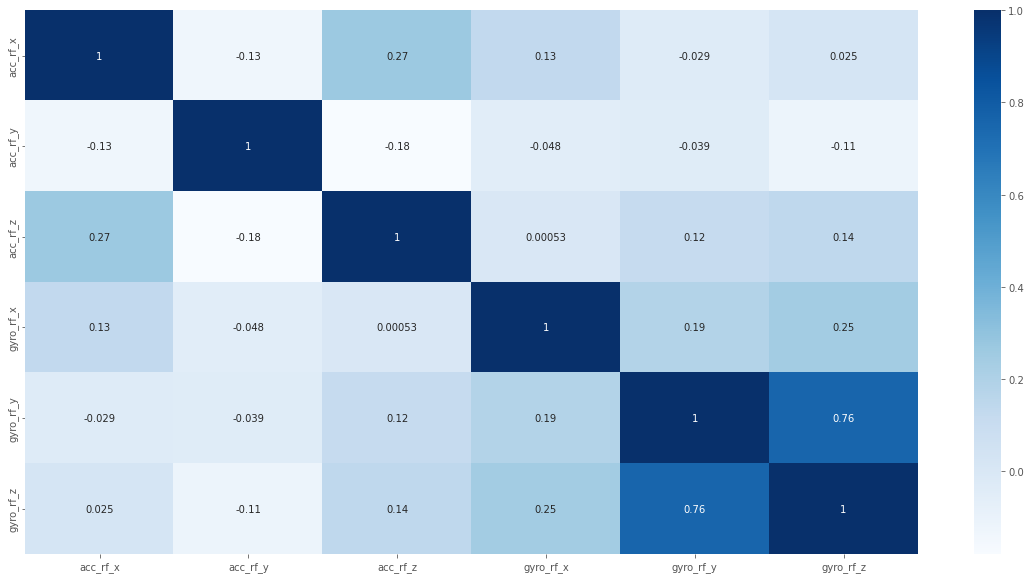

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

# Data visualization

## Activity distribution visualization

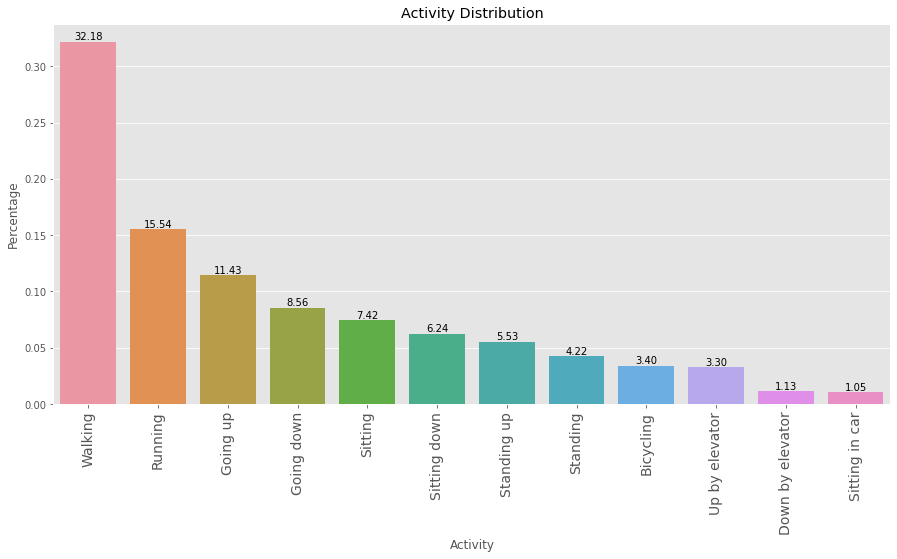

In [ ]:
plt.figure(figsize=(15,7))
yaxis = df['activity'].value_counts().values / df.shape[0]
labels = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 'Bicycling', 'Up by elevator', 'Down by elevator', 'Sitting in car']
barplot = sns.barplot(x = labels, y=yaxis)
for p in barplot.patches:
    barplot.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xticks(fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Activity Distribution")
plt.xlabel('Activity')
plt.ylabel('Percentage');

## Accelerometers visualization

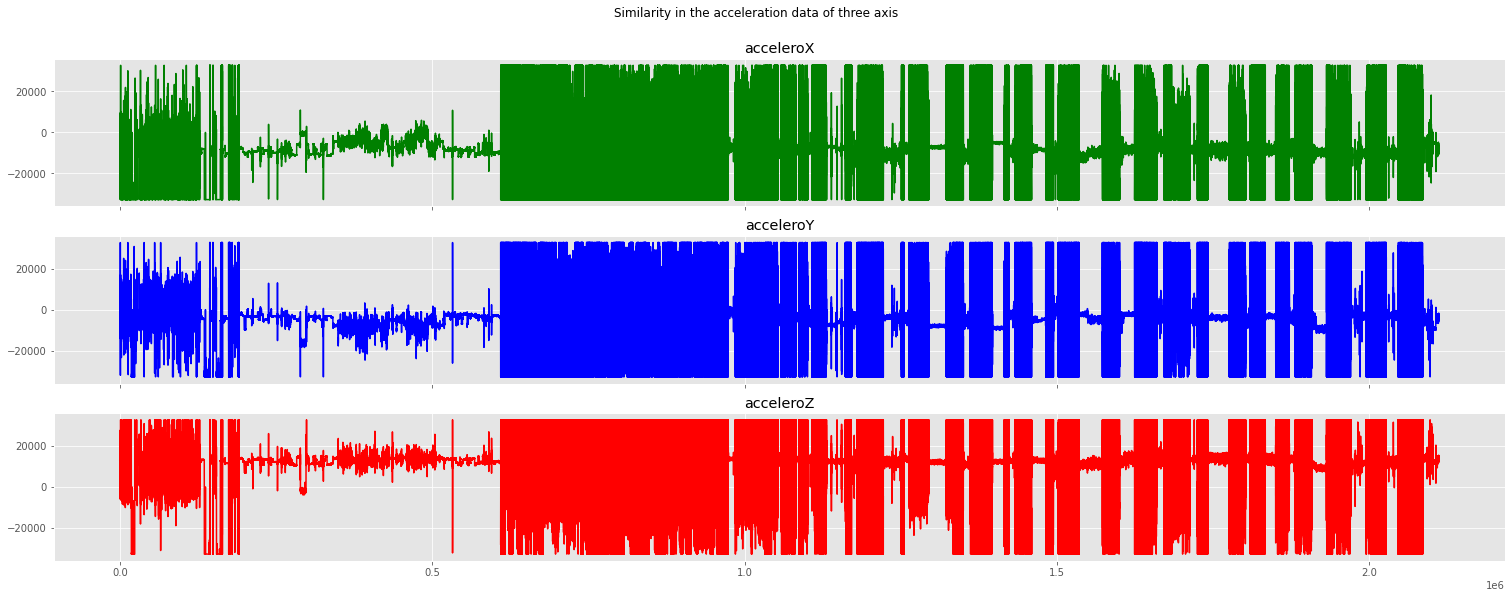

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(26,9), sharex=True)
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Similarity in the acceleration data of three axis')
plt.subplots_adjust(top=0.90)
ax1.set_title('acceleroX')
ax1.plot(df.acc_rf_x, color='green')
ax2.set_title('acceleroY')
ax2.plot(df.acc_rf_y, color='blue')
ax3.set_title('acceleroZ')
ax3.plot(df.acc_rf_z, color='red')
plt.show();

## Gyrometers visualization

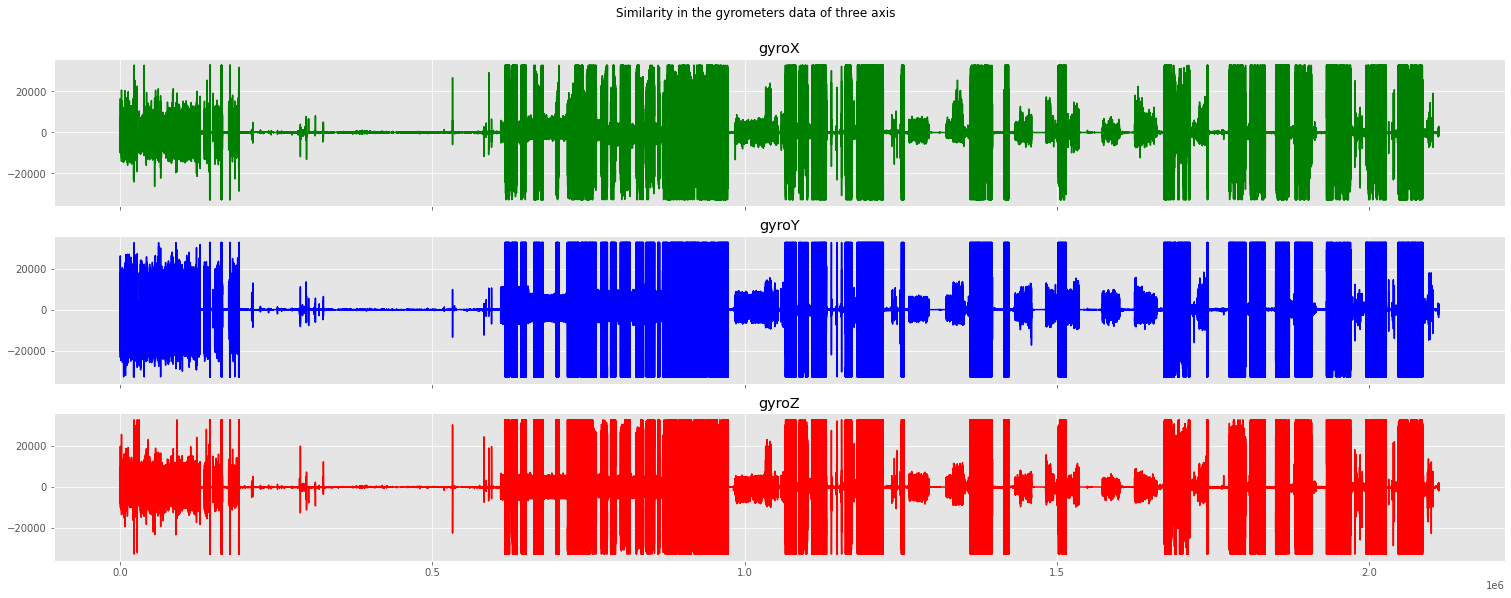

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(26,9), sharex=True)
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Similarity in the gyrometers data of three axis')
plt.subplots_adjust(top=0.90)
ax1.set_title('gyroX')
ax1.plot(df.gyro_rf_x, color='green')
ax2.set_title('gyroY')
ax2.plot(df.gyro_rf_y, color='blue')
ax3.set_title('gyroZ')
ax3.plot(df.gyro_rf_z, color='red')
plt.show();

# Save data in pickle format in google drive


In [ ]:
df.to_pickle("/tmp/df_1.pkl")

In [ ]:
!cp /tmp/df_1.pkl /content/drive/MyDrive/myproject/outputdata